# Cho dữ liệu đính kèm, dự đoán tuổi thọ trung bình (Life Expectancy) dựa vào các thuộc tính còn lại theo thuật toán linear regression.
1. Tính các sai số MAE, MSE, R^2
2. So sánh các giá trị sai số sau khi chuẩn hóa dữ liệu và trước khi chuẩn hóa dữ liệu
3. Sử dụng kỹ thuật cross validation để tối ưu hóa các chỉ số
4. Biểu diễn dữ liệu tuổi thọ của từng quốc gia tới năm 2030

# Library

In [2]:
# 
import numpy as np
import pandas as pd
from tabulate import tabulate
# model sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
#draw
import matplotlib.pyplot as plt
import seaborn as sns
# tính toán acu
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score, accuracy_score
from sklearn.metrics import explained_variance_score


In [796]:
# dễ nhìn hơn
def print_df(dataframe: pd.DataFrame):
    print(tabulate(dataframe, headers="keys", tablefmt='psql'))

# Read_data

In [797]:
df = pd.read_csv("./file_csv/Life Expectancy Data.csv")
display(df)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


# function use

In [798]:
# check null or NaN 
def check_null(dataframe: pd.DataFrame):
    return dataframe.isna().sum()
# convert with round
def rnd(dataframe: pd.DataFrame):
    dataframe.fillna(round(dataframe.mean()), inplace=True)
# standardize numeberic 
# can use get_dummies

def numberic(dataframe: pd.DataFrame):
    df = dataframe.copy()
    for key in df.keys():
        if df[key].dtype == object:
            df[key] = LabelEncoder().fit_transform(df[key])
    return df
# 0 -> 1
def stand(dataframe: pd.DataFrame):
    data = dataframe.copy()
    for key in data.keys():
        if data[key].dtype != object:
            data[key] = (data[key] - data[key].min()) / (data[key].max() - data[key].min()) 
    return data

## fill nan or null

In [799]:
for i in df.columns[:]:
    if check_null(df[i]) > 0:
        rnd(df[i])

## standardized data

In [800]:
# convert col 2 to col final
data_life = df['Life expectancy ']
df.drop('Life expectancy ', inplace=True, axis=1)
df["Life expectancy"] = data_life 

In [801]:
df3 = df.copy()
df3 = numberic(df3)
display(df3)

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,0,2015,1,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,0,2014,1,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,0,2013,1,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,0,2012,1,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,0,2011,1,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004,1,723.0,27,4.36,0.000000,68.0,31,27.1,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,44.3
2934,192,2003,1,715.0,26,4.06,0.000000,7.0,998,26.7,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,44.5
2935,192,2002,1,73.0,25,4.43,0.000000,73.0,304,26.3,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,44.8
2936,192,2001,1,686.0,25,1.72,0.000000,76.0,529,25.9,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,45.3


# Split data

In [802]:
# quan sát data
df3.describe()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,...,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,95.096324,2007.518720,0.825732,164.797141,30.303948,4.629084,738.251295,80.951668,2419.592240,38.317529,...,5.942944,82.321988,1.742103,7483.134305,1.275338e+07,4.841559,4.871818,0.648722,11.993193,69.224166
std,56.244904,4.613841,0.379405,124.080302,117.926501,3.917530,1987.914858,22.586867,11467.272489,19.927706,...,2.400330,23.640087,5.077785,13136.800417,5.381546e+07,4.394569,4.482729,0.222240,3.264382,9.507649
min,0.000000,2000.000000,0.000000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,...,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,36.300000
25%,46.000000,2004.000000,1.000000,74.000000,0.000000,1.092500,4.685343,81.000000,0.000000,19.400000,...,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000,63.200000
50%,93.000000,2008.000000,1.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,...,5.950000,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.689500,12.100000,72.000000
75%,145.000000,2012.000000,1.000000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,...,7.330000,97.000000,0.800000,7483.000000,1.275338e+07,7.100000,7.200000,0.797000,14.100000,75.600000
max,192.000000,2015.000000,1.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,...,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,1.000000,20.700000,89.000000


In [803]:
x_train, x_test, y_train, y_test  = train_test_split(df3.iloc[:, :-1], df3.iloc[:,-1], test_size=0.15, random_state=42)

# Assignment

## câu 1: Tính các sai số MAE, MSE, R^2

In [804]:
x, y = df3.iloc[:, :-1], df3.iloc[:, -1]

lig = LinearRegression()
lig.fit(x, y)

y_predict = lig.predict(x)
print("Metric MSE: ", mean_squared_error(y_true=y, y_pred=y_predict, squared=True))
print("Metric MSA: ", mean_absolute_error(y_true=y, y_pred=y_predict))
print("Metric R2: ", r2_score(y_true=y, y_pred=y_predict) * 100, "\n")


Metric MSE:  16.533746270994556
Metric MSA:  3.040058347891863
Metric R2:  81.70329758710322 



## Câu 2: So sánh các giá trị sai số sau khi chuẩn hóa dữ liệu và trước khi chuẩn hóa dữ liệu

### 1. Before normalize

In [805]:
# linear regression
lir = LinearRegression()
lir.fit(x_train, y_train)

LinearRegression()

In [806]:

y_pre = lir.predict(x_test)
y1_pre = lir.predict(x_train)
print("Train MSE: ", mean_squared_error(y_true=y_train, y_pred=y1_pre, squared=True))
print("Train MSA: ", mean_absolute_error(y_true=y_train, y_pred=y1_pre))
print("Train R2: ", r2_score(y_true=y_train, y_pred=y1_pre) * 100, "\n")

print("Test MSE: ", mean_squared_error(y_true=y_test, y_pred=y_pre, squared=True))
print("Test MSA: ", mean_absolute_error(y_true=y_test, y_pred=y_pre))
print("Test R2: ", r2_score(y_true=y_test, y_pred=y_pre) * 100)


Train MSE:  16.71437339119976
Train MSA:  3.0544603154884102
Train R2:  81.53102344272996 

Test MSE:  15.676841571951943
Test MSA:  2.9195546914609243
Test R2:  82.3713368993881


/tmp/ipykernel_7997/1021827421.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y1_pre, y_train, "ro", c="b")


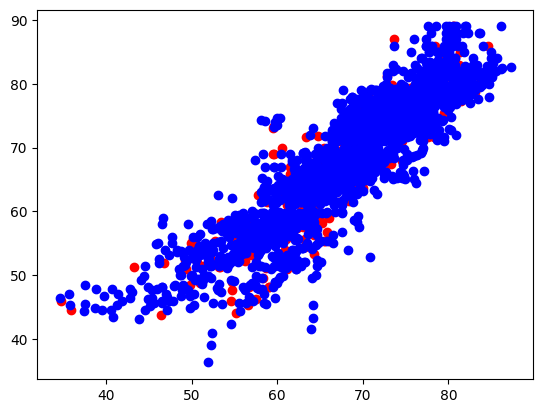

In [807]:
# vizualize
plt.plot(y_pre, y_test, "ro")
plt.plot(y1_pre, y_train, "ro", c="b")
plt.show()

### 2. After normalize

In [808]:

sc = StandardScaler()
x_train  = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [809]:
# linear regression
lirg = LinearRegression()
lirg.fit(x_train, y_train)

LinearRegression()

In [810]:
yA_pre = lirg.predict(x_test)
yA1_pre = lirg.predict(x_train)
print("Train MSE: ", mean_squared_error(y_true=y_train, y_pred=yA1_pre, squared=True))
print("Train MSA: ", mean_absolute_error(y_true=y_train, y_pred=yA1_pre))
print("Train R2: ", r2_score(y_true=y_train, y_pred=yA1_pre) * 100)
print("Train explained_variance_score: ",explained_variance_score(y_true=y_train, y_pred=yA1_pre), "\n")

print("Test MSE: ", mean_squared_error(y_true=y_test, y_pred=yA_pre, squared=True))
print("Test MSA: ", mean_absolute_error(y_true=y_test, y_pred=yA_pre))
print("Test R2: ", r2_score(y_true=y_test, y_pred=yA_pre) * 100)

Train MSE:  16.714373391199764
Train MSA:  3.0544603154881758
Train R2:  81.53102344272996
Train explained_variance_score:  0.8153102344272996 

Test MSE:  16.656519009001748
Test MSA:  3.0296286769729566
Test R2:  81.26968619980323


/tmp/ipykernel_7997/2019941905.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(yA1_pre, y_train, 'ro', color='b')


[]

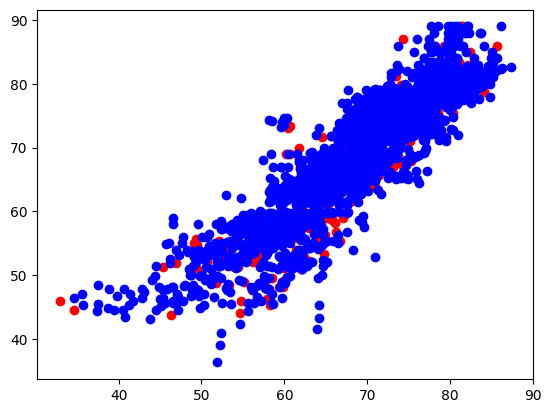

In [811]:
# vizualize
plt.plot(yA_pre, y_test, 'ro')
plt.plot(yA1_pre, y_train, 'ro', color='b')
plt.plot()

## Câu 3: Sử dụng kỹ thuật cross validation để tối ưu hóa các chỉ số

In [812]:
# display(df3)
# check_null(df3)

In [813]:
# map head
# sns.heatmap(df3.corr(), annot=True, cmap='RdYlGn',
#             linewidths=0.2)
# fig = plt.gcf()
# fig.set_size_inches(12, 8)
# plt.show()

In [814]:
logit = LinearRegression()
standard_scaler = StandardScaler()
x_train = standard_scaler.fit_transform(x_train)
scoring = ['r2', "neg_mean_squared_error", "neg_mean_absolute_error"]

pipeLine = make_pipeline(standard_scaler, logit)
kf = KFold(n_splits=5, shuffle=True, random_state=2)

cv_resutls = cross_validate(
    pipeLine, x_train, y_train, cv=kf, n_jobs=-1, scoring=scoring)

cv_resutls

{'fit_time': array([0.00714254, 0.00798345, 0.00908971, 0.01071811, 0.0099299 ]),
 'score_time': array([0.00164056, 0.00207996, 0.00304937, 0.0018816 , 0.00373197]),
 'test_r2': array([0.80554931, 0.82943326, 0.82611757, 0.80451849, 0.78389388]),
 'test_neg_mean_squared_error': array([-16.45694718, -15.42317316, -16.86118574, -17.23122024,
        -19.87587489]),
 'test_neg_mean_absolute_error': array([-3.12846459, -2.93890594, -3.12084464, -3.08882473, -3.19233507])}

In [815]:
print('test_r2: ', round(cv_resutls['test_r2'].mean(), 6))
print('test_neg_mean_absolute_error: ', round(cv_resutls['test_neg_mean_absolute_error'].mean(), 6))
print("test_neg_mean_squared_error: ", round(cv_resutls["test_neg_mean_squared_error"].mean(), 6))


test_r2:  0.809903
test_neg_mean_absolute_error:  -3.093875
test_neg_mean_squared_error:  -17.16968


## Câu 4: Biểu diễn dữ liệu tuổi thọ của từng quốc gia tới năm 2030

In [816]:
# mô hình
x, y = df3.iloc[:, :2], df3.iloc[:, -1]
linear_regres = LinearRegression()
linear_regres.fit(x, y)
# data_2030_predict = linear_regres.predict(data_2030)

LinearRegression()

In [817]:
# const
array_country = list(df['Country'].value_counts().index)
data_country = list(df['Country'])

In [818]:
# data year
def predict_to_year(year: int):
    data_year = pd.DataFrame({
    "Country": df3['Country'],
    "Year": pd.Series([year] * 2938),
    })
    return data_year

In [819]:
def mean_year(data_year_predict: list):
    dict_mean_country = dict()
    for i in array_country:
        dict_mean_country[i] = []
    for i in range(len(data_country)):
        dict_mean_country[data_country[i]].append(data_year_predict[i])
    array_country_old = []
    for i in array_country:
        array_country_old.append(float(round(pd.DataFrame(dict_mean_country[i]).mean(), 6)))
    return array_country_old

In [820]:
# data cho biểu diễn
data_seaborn_country = list(df['Country'])
data_seaborn_year = list(df3['Year'])
data_seaborn_Life = list(df3['Life expectancy'])

In [821]:
#  các năm
for year in range(2016, 2031):
    data_year = predict_to_year(year)
    data_year_predict = linear_regres.predict(data_year)
    data_year_predict = list(data_year_predict)
    array_country_old = mean_year(data_year_predict)
    data_seaborn_country.extend(array_country)
    data_seaborn_year.extend([year] * 193)
    data_seaborn_Life.extend(array_country_old)


In [822]:
# create Data frame
data_seaborn = pd.DataFrame({
    "Country" : pd.Series(data_seaborn_country),
    "Year" : pd.Series(data_seaborn_year),
    "Life expectancy" : pd.Series(data_seaborn_Life),
})

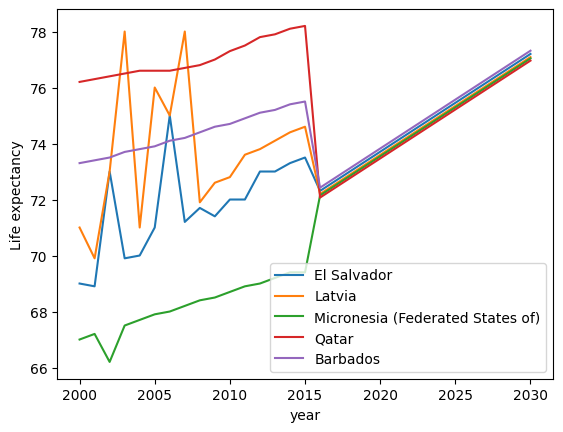

In [824]:
country_set = set(data_seaborn['Country'])

plt.figure()
plt.xlabel("year")
plt.ylabel("Life expectancy")
idx: int = 0
for country in country_set:
     selected_data = data_seaborn.loc[data_seaborn['Country'] == country]
     list_1 = list(selected_data['Year'])
     list_2 = list(selected_data['Life expectancy'])
     for i in range(len(list_1) - 1):
          for j in range(i + 1, len(list_1)):
               if list_1[i] < list_1[j]:
                    list_1[j], list_1[i] = list_1[i], list_1[j]
                    list_2[j], list_2[i] = list_2[i], list_2[j]
     plt.plot(list_1, list_2,label=country )
     if idx == 4:
          break
     idx += 1
     
plt.legend()
plt.show()